In [24]:
import pickle 
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gzip
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
f = gzip.GzipFile('cb513_window19Q8.npy.gz', "r")
testset = np.load(f)
print(testset.shape)

(80119, 19, 50)


In [3]:
path = "kfold-pssmQ8"
modelNr = 1
classSize = 8

In [14]:
def get_confusion_matrix(path, i):
    
    act = []
    pred = []
    
    m =  load_model( path + "/model_kfold" + str(i) + ".h5")
    res = m.predict(testset[:,:,(21+classSize):])
    print(res.shape)
        
    for i in range(testset.shape[0]):
        act.append( np.argmax(testset[i,0,21:(21+classSize)]) )
        pred.append( np.argmax(res[i]) )
    
    return np.array(act), np.array(pred)   
    

In [15]:
act, pred = get_confusion_matrix(path, modelNr)

(80119, 8)


In [39]:
confM = confusion_matrix(act, pred)
print(confM)

[[ 9166    12  2420   383     0  1411  1285  1547]
 [  482    30   219    39     0   129    89   114]
 [ 2114    17 12924   160     0   960   318   458]
 [  409     0   114   928     0   884    98   547]
 [    5     0     3     0     0    18     1     3]
 [  505     1   169   311     0 23544    77   614]
 [ 2450     8   756   248     0   883  1981  1602]
 [ 1205     1   394   591     0  2006   592  4894]]


[Text(0, 0.5, 'L'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'E'),
 Text(0, 3.5, 'G'),
 Text(0, 4.5, 'I'),
 Text(0, 5.5, 'H'),
 Text(0, 6.5, 'S'),
 Text(0, 7.5, 'T')]

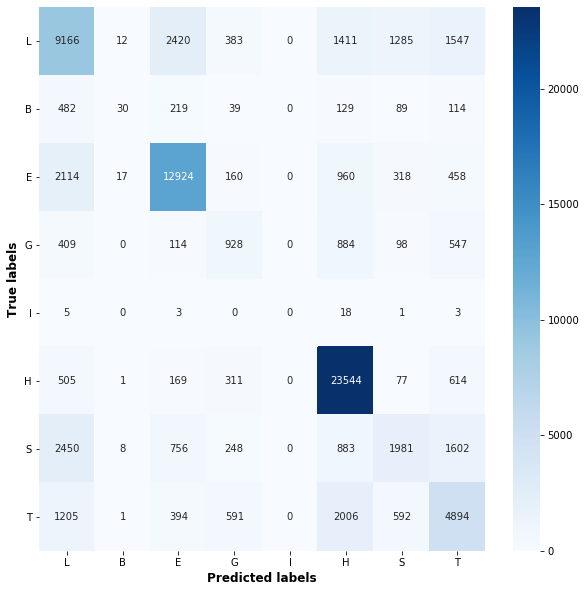

In [74]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.gca()



sn.heatmap(confM,cmap="Blues", annot=True, fmt='g')
#cmap="YlGnBu"
labels = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T']
ax.set_xlabel('Predicted labels', fontsize=12, weight='bold')
ax.set_ylabel('True labels', fontsize=12, weight='bold')


plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

